# Theory
Ensembling techniques have emerged as powerful tools in machine learning, 
aimed at enhancing model performance by combining predictions from multiple base models. These methods leverage the diversity of individual models to create a more robust and accurate prediction. Ensembling encompasses various strategies such as bagging, boosting, stacking, and hybrid approaches, each offering unique advantages in addressing different challenges in predictive modeling. By harnessing the collective intelligence of diverse models, ensembling techniques have become indispensable in pushing the boundaries of predictive accuracy across various domains, from finance and healthcare to natural language processing and computer vision. This article explores the principles, methodologies, and applications of ensembling techniques in modern machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Combine Model Predictions Into Ensemble Predictions¶
The three most popular methods for combining the predictions from different models are:

Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
Voting. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

# Importing the libraries
and Loading the dataset

# The dataset is  to be related to medical data, 
specifically for diabetes. Here’s a breakdown of what each column represents:

Pregnancies: The number of times the individual has been pregnant.
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
BloodPressure: Diastolic blood pressure (mm Hg).
SkinThickness: Triceps skin fold thickness (mm).
Insulin: 2-Hour serum insulin (mu U/ml).
BMI: Body mass index (weight in kg/(height in m)^2).
DiabetesPedigreeFunction: A function that scores likelihood of diabetes based on family history.
Age: Age in years.
Outcome: Class variable (0 or 1) where ‘0’ denotes that the person is not diabetic and ‘1’ denotes that the person is diabetic.

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploration of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

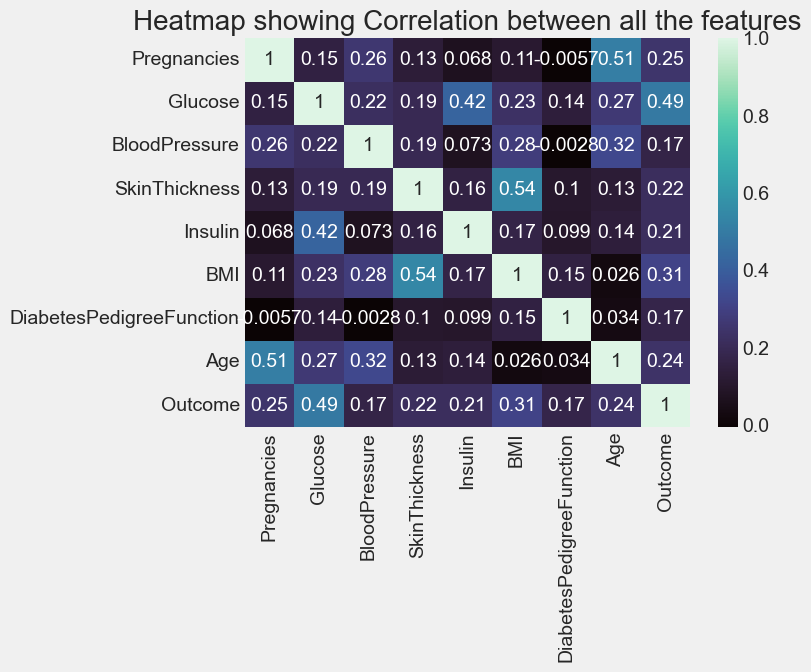

In [26]:
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

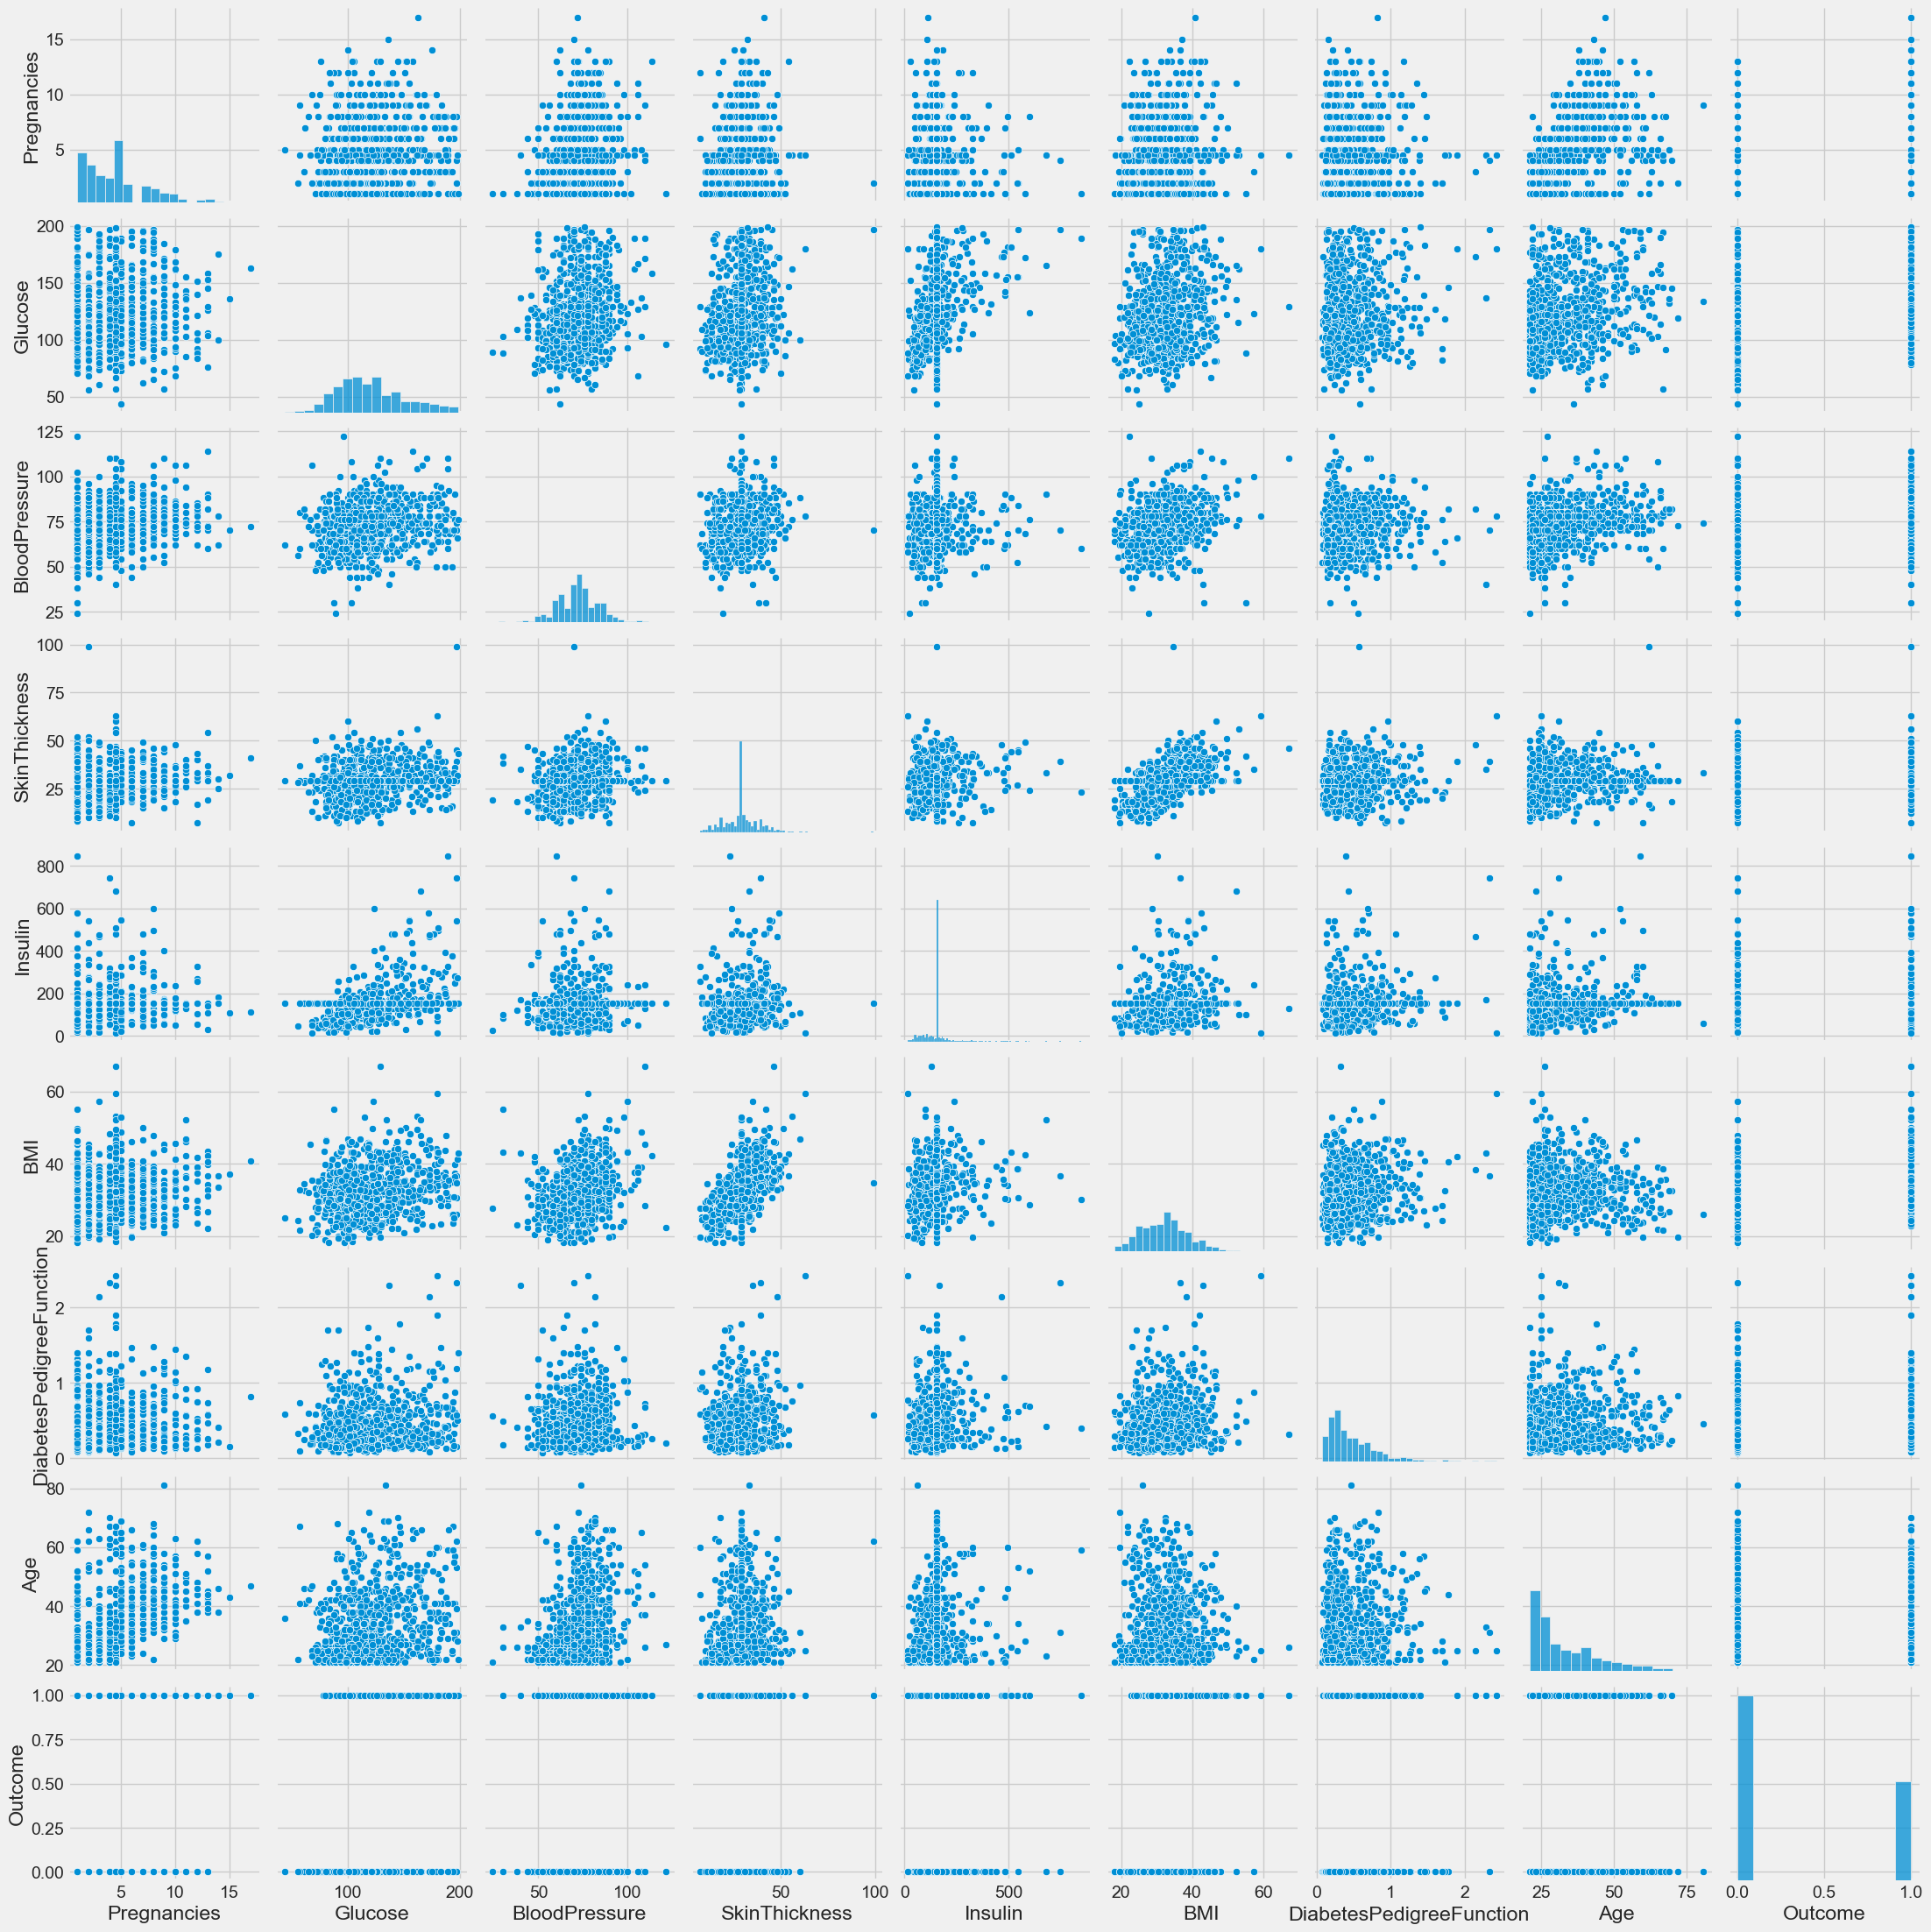

In [25]:
sns.pairplot(df)

<AxesSubplot:>

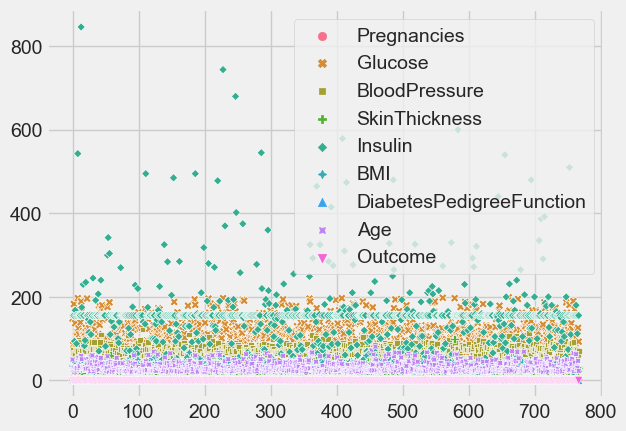

In [27]:
import seaborn
seaborn.scatterplot(data=df)


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# How many missing zeros are mising in each feature
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [9]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [10]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

Bagged Decision Trees
Random Forest
Extra Trees

# 1. Bagged Decision Trees¶
Bagging performs best with algorithms that have high variance. A popular example is decision trees, often constructed without pruning.

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.64      0.76       0.73          0.76
recall      0.79  0.70      0.76       0.74          0.76
f1-score    0.81  0.67      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [13]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

# Random Forest¶
A random forest is a meta-estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.81  0.65      0.75       0.73          0.75
recall      0.81  0.64      0.75       0.73          0.75
f1-score    0.81  0.64      0.75       0.73          0.75
support   151.00 80.00      0.75     231.00        231.00


In [15]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

# Extra Trees¶
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[124  27]
 [ 25  55]]
ACCURACY SCORE:
0.7749
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.67      0.77       0.75          0.78
recall      0.82  0.69      0.77       0.75          0.77
f1-score    0.83  0.68      0.77       0.75          0.78
support   151.00 80.00      0.77     231.00        231.00


In [17]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

# Boosting Algorithms¶
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

AdaBoost
Stochastic Gradient Boosting

# AdaBoost¶
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.83       0.82          0.83
recall      0.89   0.73      0.83       0.81          0.83
f1-score    0.87   0.75      0.83       0.81          0.83
support   349.00 188.00      0.83     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.65      0.76       0.74          0.76
recall      0.81  0.66      0.76       0.74          0.76
f1-score    0.82  0.66      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [19]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

# Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) is one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the best techniques available for improving performance via ensembles.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.96      0.95       0.95          0.95
recall      0.98   0.90      0.95       0.94          0.95
f1-score    0.96   0.93      0.95       0.95          0.95
support   349.00 188.00      0.95     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.61      0.74       0.71          0.74
recall      0.77  0.68      0.74       0.72          0.74
f1-score    0.79  0.64      0.74       0.72          0.74
support   151.00 80.00      0.74     231.00        231.00


In [21]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

# Voting Ensemble¶
Voting is one of the simplest ways of combining predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in Scikit-learn.

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.83      0.81       0.81          0.81
recall      0.94   0.56      0.81       0.75          0.81
f1-score    0.86   0.67      0.81       0.77          0.80
support   349.00 188.00      0.81     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[127  24]
 [ 37  43]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.77  0.64      0.74       0.71          0.73
recall      0.84  0.54      0.74       0.69          0.74
f1-score    0.81  0.59      0.74       0.70          0.73
support   151.00 80.00      0.74     231.00        231.00


In [23]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

# Model Comparison

<AxesSubplot:>

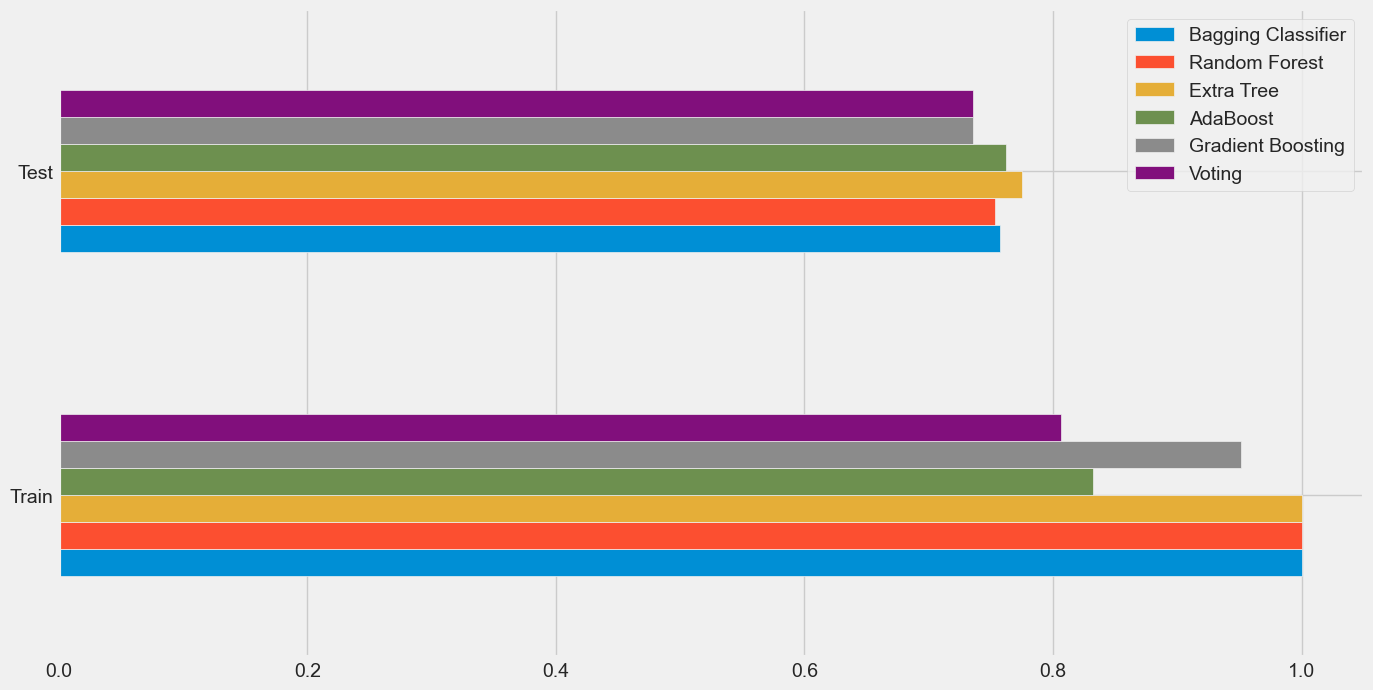

In [24]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# Conclusion:

In conclusion, the application of various ensembling techniques, including Voting Ensemble, Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, Stochastic Gradient Boosting, has demonstrated remarkable success in enhancing predictive accuracy across diverse domains. Through the collective wisdom of combining multiple base models, we have witnessed substantial improvements in model performance, achieving outstanding accuracy levels. These ensembling methods have effectively mitigated overfitting, exploited model diversity, and captured complex relationships within the data. As a result, they have become indispensable tools in the machine learning practitioner's toolkit, offering unparalleled performance and robustness in predictive modeling tasks. Moving forward, continued exploration and refinement of ensembling techniques hold promise for further advancements in predictive accuracy and model generalization across a wide array of applications.